In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("Customer Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# here at some place  where tenure is 0 means just started in totalcharge there was blank space so to convert datatype of totalcharges into float we have filled space with 0 

In [10]:
df["TotalCharges"]=df["TotalCharges"].replace(" ",0)
df["TotalCharges"]=df["TotalCharges"].astype("float")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
df.isnull().sum()  # IT WILL GIVE THE TOTAL NULL VALUES IN EACH FEILD

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


# now check for duplicates (always check in the feild that is to be unique)

In [17]:
df['customerID'].duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: customerID, Length: 7043, dtype: bool

In [18]:
df['customerID'].duplicated().sum()  # so no duplicate

0

# to simplify dataset i have converted (0/1) data into (yes/no) data 

In [19]:
def conversion(val):
    if val == 0:
        return "no"
    else:
        return "yes"

df['SeniorCitizen']=df['SeniorCitizen'].apply(conversion)

In [20]:
df.head(30)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,no,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,no,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,no,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,no,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,no,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


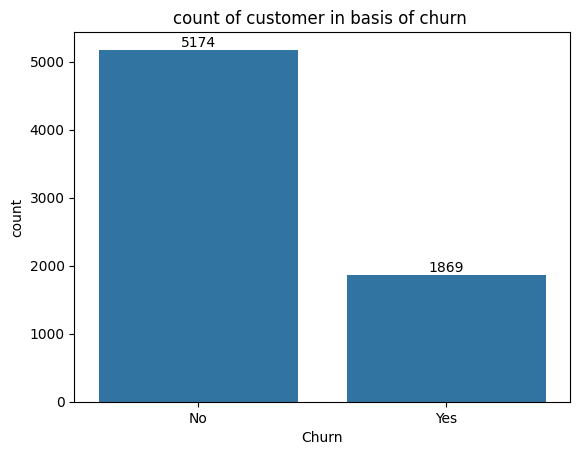

In [34]:
s=sns.countplot(x = df['Churn'],data=df)
s.bar_label(s.containers[0])
plt.title("count of customer in basis of churn ")
plt.show()

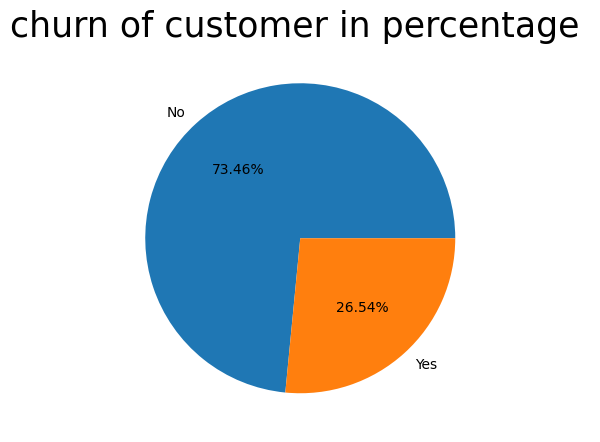

In [39]:
plt.figure(figsize=(5,6))
gb=df.groupby('Churn').agg({'Churn':"count"}) # this is to count yes and no of count
gb
plt.title("churn of customer in percentage ",fontsize=25)
plt.pie(gb['Churn'],labels=gb.index,autopct="%1.2f%%")
plt.show()

# we can see that 26.54% people have churned out let us find the reason for it 

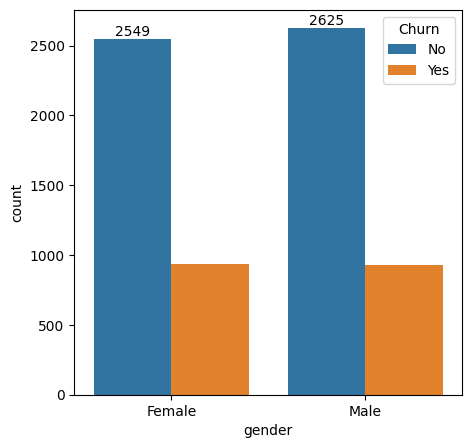

In [44]:
plt.figure(figsize=(5,5))
gen=sns.countplot(x=df['gender'],data=df,hue="Churn")
gen.bar_label(gen.containers[0])
plt.show()

# here we can obseerve churned is almost same for female and male so no conclusion from gender

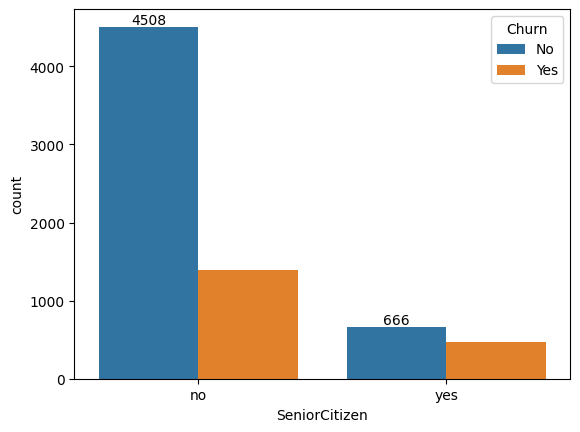

In [46]:
sc=sns.countplot(x=df['SeniorCitizen'],data=df,hue='Churn')
sc.bar_label(sc.containers[0])
plt.show()

# not much clear insights

# now use stacked bar plot 

In [49]:
t_count=df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True)  # if normalize=True it gives in percentage
t_count

SeniorCitizen  Churn
no             No       0.763938
               Yes      0.236062
yes            No       0.583187
               Yes      0.416813
Name: proportion, dtype: float64

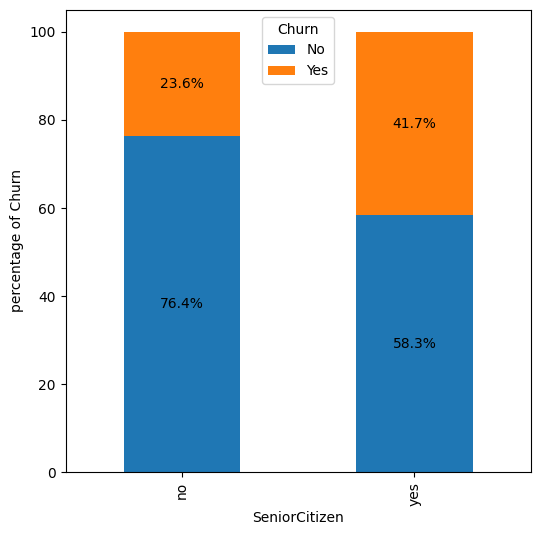

In [57]:
total_count=df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack()*100
fig,ax=plt.subplots(figsize=(6,6))
total_count.plot(kind='bar',stacked=True,ax=ax)
for p in ax.patches:
    width,height=p.get_width(),p.get_height()
    x,y=p.get_xy()
    ax.text(x+width/2,y+height/2,f'{height:.1f}%',ha='center',va='center')
plt.legend(title='Churn', loc='upper center')
plt.xlabel("SeniorCitizen")
plt.ylabel("percentage of Churn")
plt.show()

# it is observed that senior citizen have churned more as compared to non senior citizen 

# now lets take a look for impact of tenure 

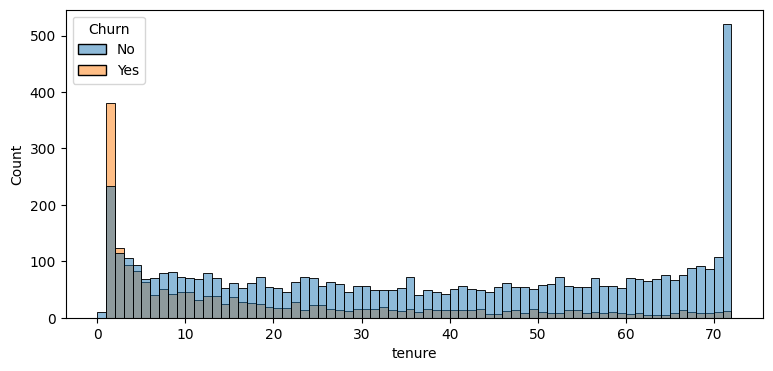

In [64]:
plt.figure(figsize=(9,4))
sns.histplot(x=df['tenure'],data=df,bins=72,hue='Churn')
plt.show()

In [65]:
df['tenure'].max()

72

# here we can see that customers with 1 or 2 months tenure has more churned with increase in tenure there is gradual decrease in churned cutomer

# now observe for contract 

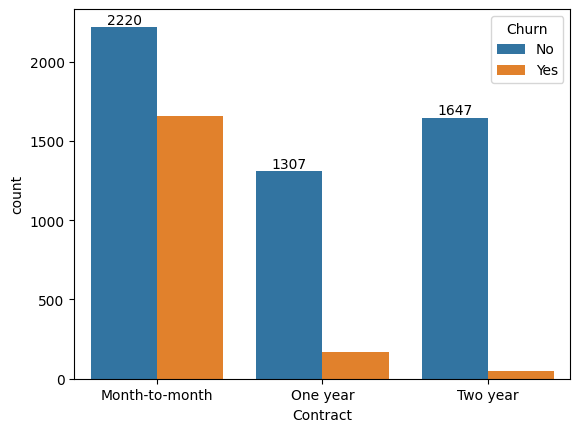

In [67]:
co=sns.countplot(x='Contract',data=df,hue='Churn')
co.bar_label(co.containers[0])
plt.show()

# person with short term contract is more likly to churn then the person having one or two years of contract

In [68]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

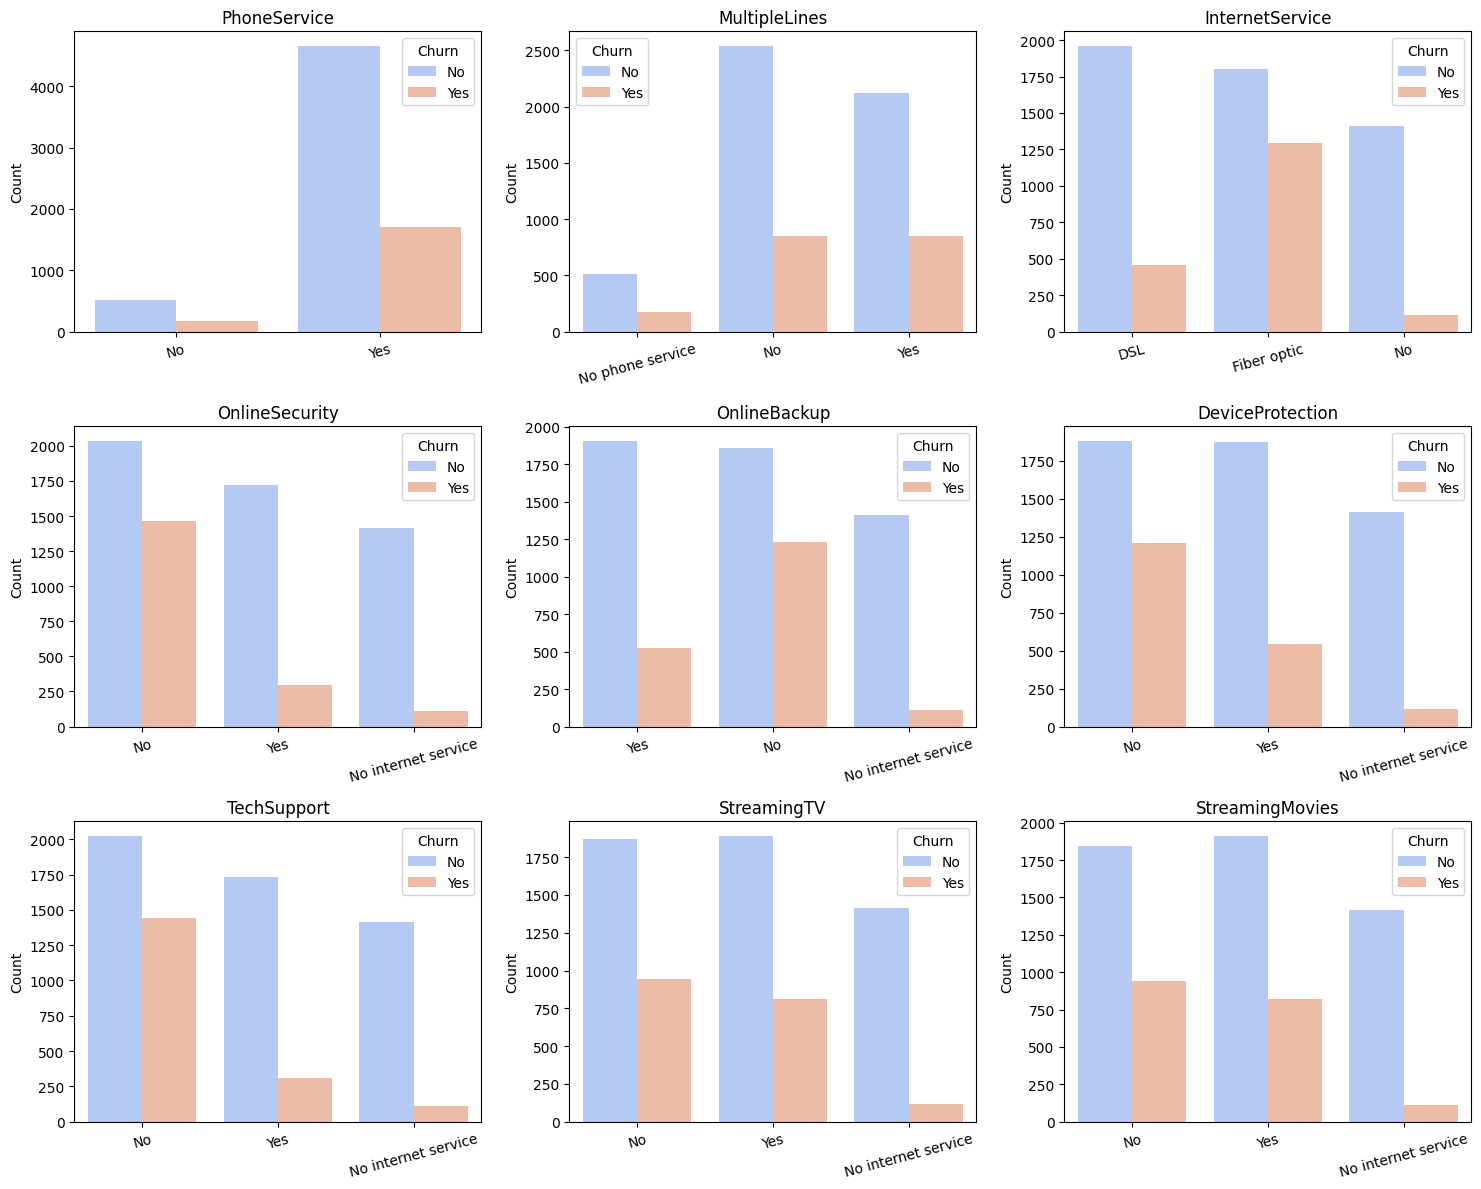

In [71]:

columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set figure size
fig, axes = plt.subplots(3, 3, figsize=(15, 12))  # 3x3 grid

# Flatten axes array for easy iteration
axes = axes.flatten()

# Loop through each column and create a bar plot
for i, col in enumerate(columns):
    sns.countplot(x=df[col], ax=axes[i], palette="coolwarm",hue=df['Churn'])
    axes[i].set_title(col)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=15)  # Rotate x-axis labels for better readability

# Adjust layout
plt.tight_layout()
plt.show()


# we can see people using multiline is churning and ,people using fiber optics are churning very much , people with no onlinesecurity is churning high
# same goes for customer without onlinebackup , no device protection customers are also churning much,streamingTV and streaming movies does not have that much effect 

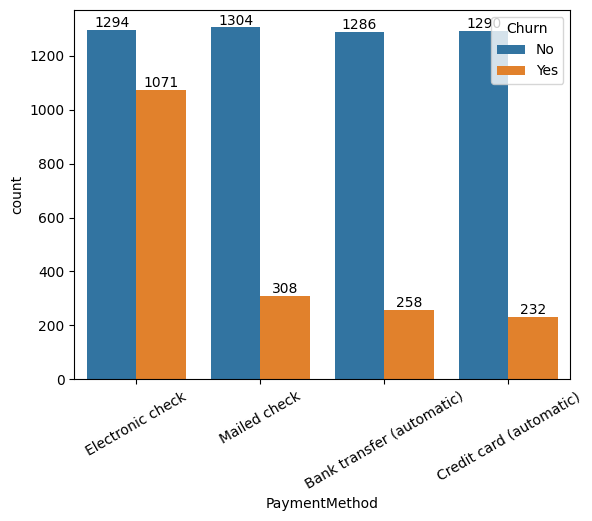

In [74]:
pm=sns.countplot(x='PaymentMethod',data=df,hue='Churn')
pm.bar_label(pm.containers[0])
pm.bar_label(pm.containers[1])
plt.xticks(rotation=30)
plt.show()

# person having cheque payment is more churning  